Final Project Submission <br>
Student name: Qilun Chen, Evan Serrano<br>
Student pace: full time<br>
Scheduled project review date/time: April/1/2022<br>
Instructor name: Praveen Gowtham, Joe Comeaux<br>
Blog post URL:https://github.com/nkbuddy/dsc-phase-3-project-NBA

### Table of Contents
* [STEP 1: Define the Problem](#Define-the-Problem)
* [Step 2: Gather the Data](#Gather-the-Data)
* [Step 3: Prepare Data for Consumption](#Prepare-Data-for-Consumption)
    * [3.1 Import Libraries](#Import-Libraries)
        * [3.11 Load Data Modelling Libraries](#Load-Data-Modelling-Libraries)
    * [3.2 Meet and Greet Data](#Meet-and-Greet-Data)
        * [3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting](#4C)
        * [3.22 Clean Data](#Clean-Data)
        * [3.23 Convert Formats](#Convert-Formats)
        * [3.24 Da-Double Check Cleaned Data](#Da-Double-Check-Cleaned-Data)
        * [3.25 Split Training and Testing Data](#Split-Training-and-Testing-Data)
* [Step 4: Perform Exploratory Analysis with Statistics](#Perform-Exploratory-Analysis-with-Statistics)
* [Step 5: Model Data](#Model-Data)
    * [5.1 Evaluate Model Performance](#Evaluate-Model-Performance)
        * [5.11 Model Performance with Cross-Validation (CV)](#CV)
        * [5.12 Tune Model with Hyper-Parameters](#Tune-Model-with-Hyper-Parameters)
        * [5.13 Tune Model with Feature Selection](#Tune-Model-with-Feature-Selection)
* [Step 6: Validate and Implement](#Validate-and-Implement)
* [STEP 7: Optimize and Strategize](#Optimize-and-Strategize)

# STEP 1: Define the Problem <a class="anchor" id="Define-the-Problem"></a>

Analysis of what sorts of XXX were likely to make a shot in NBA. In particular, we ask you to apply the tools of machine learning to predict which XX make the shot.<br>

Binary classification problem

# Step 2: Gather the Data <a class="anchor" id="Gather-the-Data"></a>

The dataset is also given to us at kaggle https://www.kaggle.com/datasets/dansbecker/nba-shot-logs

# Step 3: Prepare Data for Consumption <a class="anchor" id="Prepare-Data-for-Consumption"></a>

## 3.1 Import Libraries <a class="anchor" id="Import-Libraries"></a>

In [158]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import random
import time
import warnings
import datetime
warnings.filterwarnings('ignore')
from subprocess import check_output

## 3.11 Load Data Modelling Libraries <a class="anchor" id="Load-Data-Modelling-Libraries"></a>

In [159]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, set_config
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, Normalizer
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, KFold
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from scipy import stats as stats
from pandas.plotting import scatter_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

## 3.2 Meet and Greet Data <a class="anchor" id="Meet-and-Greet-Data"></a>

1)The FGM variable is outcome or dependent variable. It is a binary nominal datatype of 1 for make and 0 for missed. 
All other variables are potential or independent variables. 
Its important to note, more predictor variables do not make a better model, but the right variables.
<br>
2)The GameID, match, win, Final_margin, shot_number, and PTS are assumed to be random unique identifiers, that have no impact on the outcome veribale. Thus, they will be excluded from analysis.
<br>
4)The Name and shot_number variable are nominal datatype. It could be used in feature engineering to derive the who the best defender is, the hot-hand hypothesis, etc. Since these variables already exist, we'll make use of it to see if player makes a difference.
<br>
5)The Location and PTS_type variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
<br>
6)The game_clock, shot_clock, dribbles,  touch_time, shot_distance, and closet_defender_distance variable are continuous quantitative datatypes.
<br>
7)The SibSp represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.
<br>
8)The Cabin variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.


In [160]:
df = pd.read_csv('shot_logs.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


### 3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting <a class="anchor" id="4C"></a>

In [161]:
print('columns with null values:\n', df.isnull().sum())


columns with null values:
 GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64


In [162]:
df.describe(include = 'all')

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
count,1.280690e+05,128069,128069,128069,128069.000000,128069.000000,128069.000000,128069,122502.000000,128069.000000,...,128069.000000,128069.000000,128069,128069,128069.000000,128069.000000,128069.000000,128069.000000,128069,128069.000000
unique,NaN,1808,2,2,NaN,NaN,NaN,719,NaN,NaN,...,NaN,NaN,2,473,NaN,NaN,NaN,NaN,281,NaN
top,NaN,"FEB 07, 2015 - DAL vs. POR",A,W,NaN,NaN,NaN,0:01,NaN,NaN,...,NaN,NaN,missed,"Ibaka, Serge",NaN,NaN,NaN,NaN,james harden,NaN
freq,NaN,105,64135,64595,NaN,NaN,NaN,859,NaN,NaN,...,NaN,NaN,70164,814,NaN,NaN,NaN,NaN,1054,NaN
mean,2.140045e+07,NaN,NaN,NaN,0.208723,6.506899,2.469427,NaN,12.453344,2.023355,...,13.571504,2.264670,NaN,NaN,159038.487284,4.123015,0.452139,0.997314,NaN,157238.251247
std,2.578773e+02,NaN,NaN,NaN,13.233267,4.713260,1.139919,NaN,5.763265,3.477760,...,8.888964,0.441159,NaN,NaN,78791.172947,2.756446,0.497706,1.130978,NaN,79362.389336
min,2.140000e+07,NaN,NaN,NaN,-53.000000,1.000000,1.000000,NaN,0.000000,0.000000,...,0.000000,2.000000,NaN,NaN,708.000000,0.000000,0.000000,0.000000,NaN,708.000000
25%,2.140023e+07,NaN,NaN,NaN,-8.000000,3.000000,1.000000,NaN,8.200000,0.000000,...,4.700000,2.000000,NaN,NaN,101249.000000,2.300000,0.000000,0.000000,NaN,101162.000000
50%,2.140045e+07,NaN,NaN,NaN,1.000000,5.000000,2.000000,NaN,12.300000,1.000000,...,13.700000,2.000000,NaN,NaN,201949.000000,3.700000,0.000000,0.000000,NaN,201939.000000
75%,2.140067e+07,NaN,NaN,NaN,9.000000,9.000000,3.000000,NaN,16.675000,2.000000,...,22.500000,3.000000,NaN,NaN,203079.000000,5.300000,1.000000,2.000000,NaN,202704.000000


### 3.22 Clean Data <a class="anchor" id="Clean-Data"></a>

In [163]:
df['SHOT_CLOCK'].fillna(0, inplace = True)

In [164]:
df['TOUCH_TIME'] = df['TOUCH_TIME'].clip(lower=0)

In [165]:
import datetime
df['TIME_ELAPSED_SECS'] = pd.to_datetime(df['GAME_CLOCK'], format='%M:%S')
df['TIME_ELAPSED_SECS'] = df['TIME_ELAPSED_SECS'].dt.hour * 3600 + df['TIME_ELAPSED_SECS'].dt.minute * 60 + df['TIME_ELAPSED_SECS'].dt.second
df['TIME_ELAPSED_SECONDS'] = (720 * df['PERIOD']) - df['TIME_ELAPSED_SECS']

In [166]:
df['LOCATION'] = df['LOCATION'].astype('category')
df['LOCATION'] = df['LOCATION'].cat.codes

In [167]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [168]:
drop_column = ['GAME_ID','MATCHUP', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER','CLOSEST_DEFENDER','CLOSEST_DEFENDER_PLAYER_ID','PTS','player_name','player_id', 'SHOT_RESULT','GAME_CLOCK','PERIOD','TIME_ELAPSED_SECS']
df = df.drop(drop_column, axis=1)
print(df.isnull().sum())

LOCATION                0
SHOT_CLOCK              0
DRIBBLES                0
TOUCH_TIME              0
SHOT_DIST               0
PTS_TYPE                0
CLOSE_DEF_DIST          0
FGM                     0
TIME_ELAPSED_SECONDS    0
dtype: int64


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   LOCATION              128069 non-null  int8   
 1   SHOT_CLOCK            128069 non-null  float64
 2   DRIBBLES              128069 non-null  int64  
 3   TOUCH_TIME            128069 non-null  float64
 4   SHOT_DIST             128069 non-null  float64
 5   PTS_TYPE              128069 non-null  int64  
 6   CLOSE_DEF_DIST        128069 non-null  float64
 7   FGM                   128069 non-null  int64  
 8   TIME_ELAPSED_SECONDS  128069 non-null  int64  
dtypes: float64(4), int64(4), int8(1)
memory usage: 7.9 MB


### 3.23 Convert Formats <a class="anchor" id="Convert-Formats"></a>

In [170]:
df.loc[df['TOUCH_TIME']>1]

,LOCATION,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,TIME_ELAPSED_SECONDS
0,0,10.8,2,1.9,7.7,2,1.3,1,651
2,0,0.0,3,2.7,10.1,2,0.9,0,720
3,0,10.3,2,1.9,17.2,2,3.4,0,733
4,0,10.9,2,2.7,3.7,2,1.1,0,806
5,0,9.1,2,4.4,18.4,2,2.6,0,945
...,...,...,...,...,...,...,...,...,...
128064,0,18.3,5,6.2,8.7,2,0.8,0,2048
128065,0,19.8,4,5.2,0.6,2,0.6,1,2192
128066,0,23.0,2,4.2,16.9,2,4.2,1,2210
128067,0,9.1,4,4.5,18.3,2,3.0,0,2723


In [180]:
df[['IsCatchAndShot','IsLayupOrDunk','Is3point','IsOpen']] = 1
df["IsCatchAndShot"].loc[df["TOUCH_TIME"]>1] = 0
df['IsLayupOrDunk'].loc[df['SHOT_DIST']>3] = 0
df['Is3point'].loc[df['PTS_TYPE']==2] = 0
df['IsOpen'].loc[df['CLOSE_DEF_DIST']<3] = 0
df.head()

,LOCATION,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,TIME_ELAPSED_SECONDS,IsCatchAndShot,IsLayupOrDunk,Is3point,IsOpen
0,0,10.8,2,1.9,7.7,2,1.3,1,651,0,0,0,0
1,0,3.4,0,0.8,28.2,3,6.1,0,706,1,0,1,1
2,0,0.0,3,2.7,10.1,2,0.9,0,720,0,0,0,0
3,0,10.3,2,1.9,17.2,2,3.4,0,733,0,0,0,1
4,0,10.9,2,2.7,3.7,2,1.1,0,806,0,0,0,0


### 3.24 Da-Double Check Cleaned Data <a class="anchor" id="Da-Double-Check-Cleaned-Data"></a>

In [181]:
print('columns with null values: \n', df.isnull().sum())
print("-"*10)
print (df.info())
print("-"*10)

df.describe(include = 'all')

columns with null values: 
 LOCATION                0
SHOT_CLOCK              0
DRIBBLES                0
TOUCH_TIME              0
SHOT_DIST               0
PTS_TYPE                0
CLOSE_DEF_DIST          0
FGM                     0
TIME_ELAPSED_SECONDS    0
IsCatchAndShot          0
IsLayupOrDunk           0
Is3point                0
IsOpen                  0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   LOCATION              128069 non-null  int8   
 1   SHOT_CLOCK            128069 non-null  float64
 2   DRIBBLES              128069 non-null  int64  
 3   TOUCH_TIME            128069 non-null  float64
 4   SHOT_DIST             128069 non-null  float64
 5   PTS_TYPE              128069 non-null  int64  
 6   CLOSE_DEF_DIST        128069 non-null  float64
 7   FGM                   1280

,LOCATION,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,TIME_ELAPSED_SECONDS,IsCatchAndShot,IsLayupOrDunk,Is3point,IsOpen
count,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,0.499215,11.912012,2.023355,2.771957,13.571504,2.264670,4.123015,0.452139,1426.593368,0.376641,0.140034,0.264670,0.624937
std,0.500001,6.182215,3.477760,2.986698,8.888964,0.441159,2.756446,0.497706,852.012671,0.484545,0.347024,0.441159,0.484141
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.500000,0.000000,0.900000,4.700000,2.000000,2.300000,0.000000,685.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,12.000000,1.000000,1.600000,13.700000,2.000000,3.700000,0.000000,1412.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,16.400000,2.000000,3.700000,22.500000,3.000000,5.300000,1.000000,2127.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,24.000000,32.000000,24.900000,47.200000,3.000000,53.200000,1.000000,5037.000000,1.000000,1.000000,1.000000,1.000000


### 3.25 Split Training and Testing Data <a class="anchor" id="Split-Training-and-Testing-Data"></a>

In [185]:
drop_column2 = ['SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST', 'TIME_ELAPSED_SECONDS', 'FGM']
X = df.drop(columns=drop_column2,axis =1)
y = df['FGM']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
print("DataFrame Shape: {}".format(df.shape))
print("Train Shape: {}".format(X_train.shape))
print("Test Shape: {}".format(X_test.shape))

DataFrame Shape: (128069, 13)
Train Shape: (96051, 5)
Test Shape: (32018, 5)


# Step 4: Perform Exploratory Analysis with Statistics <a class="anchor" id="Perform-Exploratory-Analysis-with-Statistics"></a>

In [186]:
for x in X:
    print('shot Correlation by:', x)
    print(df[[x, 'FGM']].groupby(x, as_index=False).mean())
    print('-'*10, '\n')

shot Correlation by: LOCATION
   LOCATION       FGM
0         0  0.448117
1         1  0.456174
---------- 

shot Correlation by: IsCatchAndShot
   IsCatchAndShot       FGM
0               0  0.434069
1               1  0.482047
---------- 

shot Correlation by: IsLayupOrDunk
   IsLayupOrDunk       FGM
0              0  0.421029
1              1  0.643192
---------- 

shot Correlation by: Is3point
   Is3point       FGM
0         0  0.488357
1         1  0.351516
---------- 

shot Correlation by: IsOpen
   IsOpen       FGM
0       0  0.461673
1       1  0.446417
---------- 



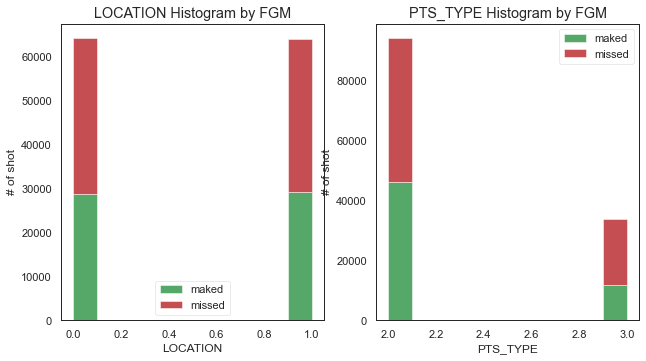

In [187]:
plt.figure(figsize=[16,12])

plt.subplot(234)
plt.hist(x = [df[df['FGM']==1]['LOCATION'], df[df['FGM']==0]['LOCATION']], 
         stacked=True, color = ['g','r'],label = ['maked','missed'])
plt.title('LOCATION Histogram by FGM')
plt.xlabel('LOCATION')
plt.ylabel('# of shot')
plt.legend()


plt.subplot(235)
plt.hist(x = [df[df['FGM']==1]['PTS_TYPE'], df[df['FGM']==0]['PTS_TYPE']], 
         stacked=True, color = ['g','r'],label = ['maked','missed'])
plt.title('PTS_TYPE Histogram by FGM')
plt.xlabel('PTS_TYPE')
plt.ylabel('# of shot')
plt.legend()

<AxesSubplot:xlabel='PTS_TYPE', ylabel='FGM'>

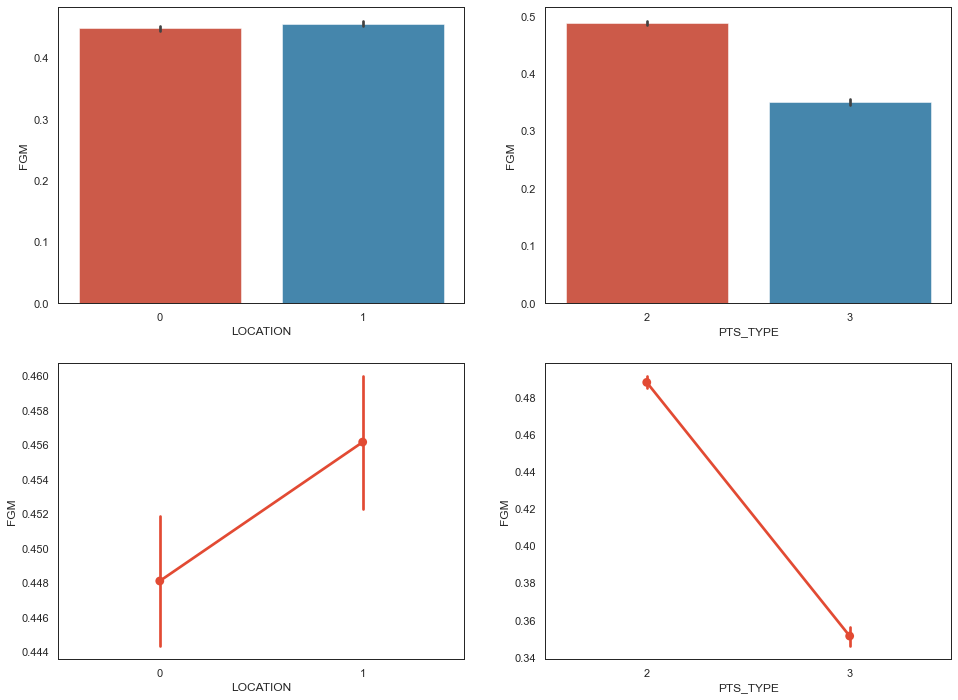

In [188]:
fig, saxis = plt.subplots(2, 2,figsize=(16,12))

sns.barplot(x = 'LOCATION', y = 'FGM', data=df, ax = saxis[0,0])
sns.barplot(x = 'PTS_TYPE', y = 'FGM', data=df, ax = saxis[0,1])

sns.pointplot(x = 'LOCATION', y = 'FGM',  data=df, ax = saxis[1,0])
sns.pointplot(x = 'PTS_TYPE', y = 'FGM', data=df, ax = saxis[1,1])

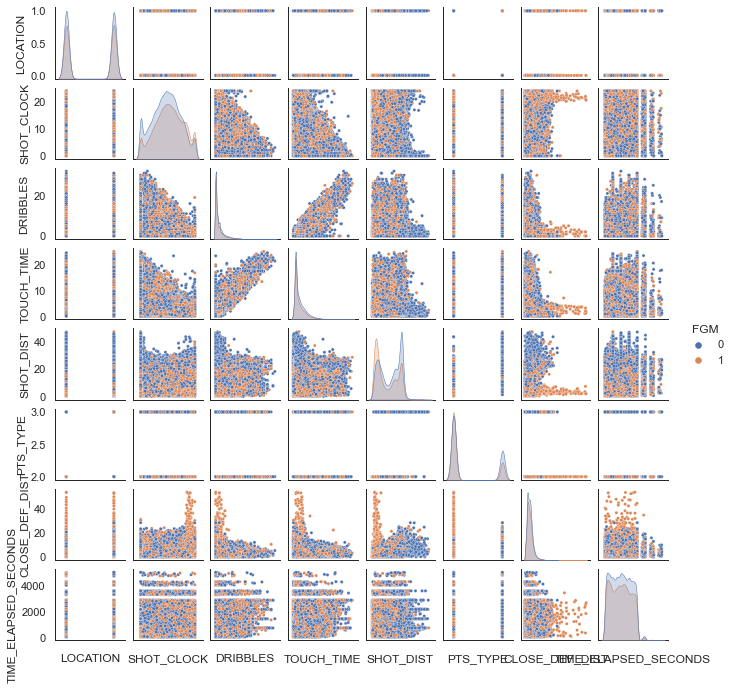

In [114]:
pp = sns.pairplot(df, hue = 'FGM', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

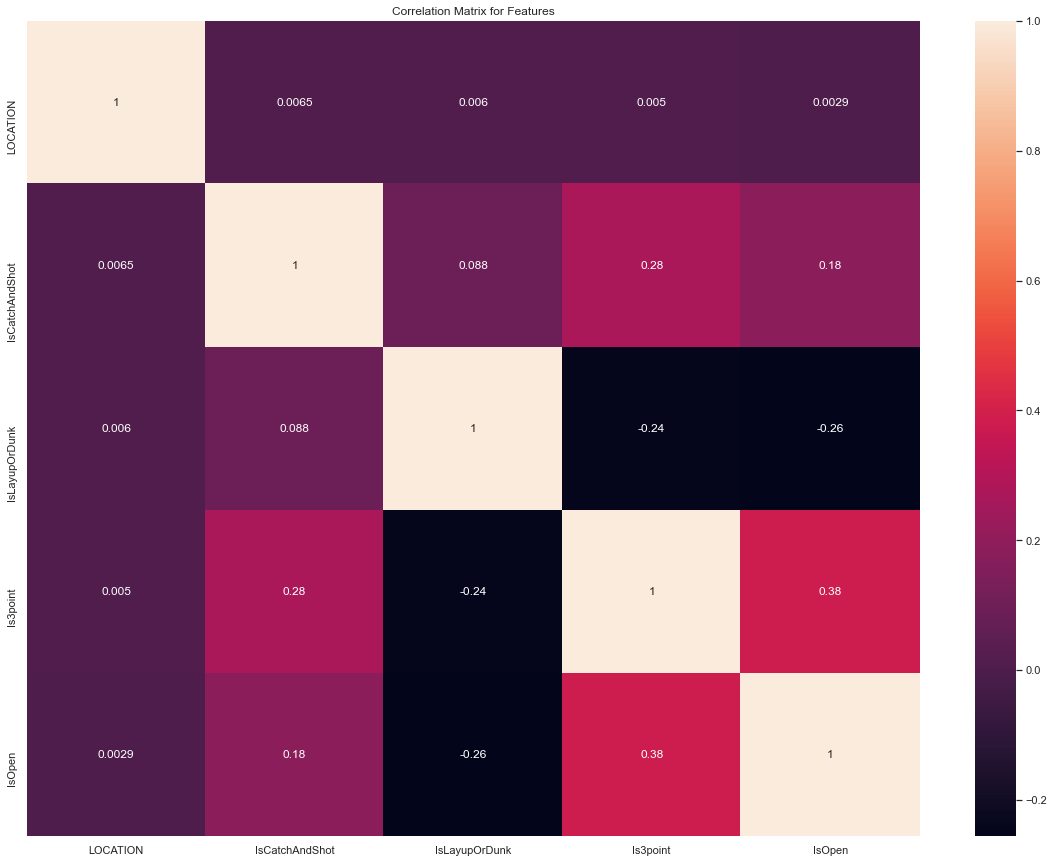

In [190]:
plt.figure(figsize = (20, 15))
sns.set(style="white")
sns.heatmap(X.corr(), annot = True)


plt.title('Correlation Matrix for Features')
plt.show()

# Step 5: Model Data <a class="anchor" id="Model-Data"></a>

### Logistic Regression

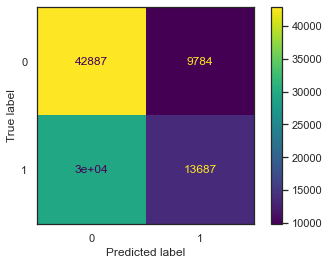

In [191]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
# Instantiate the model
model = LogisticRegression(random_state = 42)

# Fit the model on the scaled data
model.fit(X_train_scaled, y_train)
# your code here

plot_confusion_matrix(model, X_train_scaled, y_train);

In [192]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y_hat_test = model.predict(X_test_scaled)
model_accuracy = accuracy_score(y_test, y_hat_test)
model_recall = recall_score(y_test, y_hat_test)
model_precision = precision_score(y_test, y_hat_test)
model_f1 = f1_score(y_test, y_hat_test)
print(f"""
Accuracy
Fitted Model: {model_accuracy:1.3f}
Recall
Fitted Model: {model_recall:1.3f}
Precision
Fitted Model: {model_precision:1.3f}
F1 Score
Fitted Model: {model_f1:1.3f}
""")


Accuracy
Fitted Model: 0.587
Recall
Fitted Model: 0.309
Precision
Fitted Model: 0.584
F1 Score
Fitted Model: 0.404



In [193]:
baseline_model = LogisticRegression(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring="neg_log_loss")

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

0.6690707247024607

In [194]:
from sklearn.metrics import log_loss
log_loss(y_train, np.zeros(len(y_train)))

15.598922655789373

### Decision Trees

In [209]:
from sklearn.tree import DecisionTreeRegressor
# Instantiate the model
dt = DecisionTreeRegressor(random_state=1)

# Fit the model to the training data here
dt.fit(X_train,y_train)

# Testing out the model's r2 score on the training data overall
dt_train_score = dt.score(X_train, y_train)
dt_train_score

0.043529349132133244

In [208]:
from sklearn.metrics import r2_score, mean_squared_error
def performance(y_true, y_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    """

    # Calculate the r2 score between 'y_true' and 'y_predict'

    # Calculate the root mean squared error between 'y_true' and 'y_predict'

    # Return the score

    r2 = r2_score(y_true,y_predict)
    rmse = mean_squared_error(y_true,y_predict,squared=False)
    return[r2,rmse]
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor 
# Set random_state=45
regressor = DecisionTreeRegressor(random_state = 45)

# Fit the model to training data
regressor.fit(X_train,y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate performance using the performance() function 
score = performance(y_test,y_pred)
score

[0.04153919733367162, 0.487397387087341]

### K-Nearest Neighbors

In [199]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [200]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_baseline_model = KNeighborsClassifier()

knn_baseline_log_loss = -cross_val_score(knn_baseline_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_baseline_log_loss

2.1911177827142425

In [201]:
knn_second_model = KNeighborsClassifier(n_neighbors=50)

knn_second_log_loss = -cross_val_score(knn_second_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
knn_second_log_loss

0.6736537255064516

In [202]:
final_model = KNeighborsClassifier(n_neighbors=50, metric="manhattan")

# Fit the model on the full training data
# (scaled or unscaled depending on the model)
final_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=50)

In [203]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss

preds = final_model.predict(X_test_scaled)
probs = final_model.predict_proba(X_test_scaled)

print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds))
print("recall:   ", recall_score(y_test, preds))

log loss:  0.6743207986304266
accuracy:  0.5840464738584547
precision: 0.5986594735981691
recall:    0.2521170395869191


### Bayes Classification

In [204]:
prior_est = DummyClassifier(strategy = 'prior')
prior_est.fit(X_train,y_train)
prior = prior_est.predict_proba(X_test)[0]
prior_est.predict_proba(X_test)[0:2]

array([[0.54836493, 0.45163507],
       [0.54836493, 0.45163507]])

In [205]:
from sklearn.naive_bayes import GaussianNB
gb_clf = GaussianNB()
gb_clf.fit(X_train.values.reshape(-1,1), y_train)
X_test_nump = X_test.values.reshape(-1,1)
y_pred = gb_clf.predict(X_test_nump)
plot_confusion_matrix(gb_clf, X_test_nump, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [480255, 96051]

## 5.1 Evaluate Model Performance <a class="anchor" id="Evaluate-Model-Performance"></a>

### 5.11 Model Performance with Cross-Validation (CV) <a class="anchor" id="CV"></a>

In [210]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=3)

cv_scores


array([0.58990536, 0.58706312, 0.5900303 ])

In [211]:
from sklearn.model_selection import cross_validate
cv_reault = cross_validate(dt, X_train, y_train, cv=5)
dt_cv = cv_reault['test_score']

# your code here
dt_cv

array([0.04300549, 0.0460957 , 0.04197876, 0.03970564, 0.04458715])

### Stacking

In [212]:
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(0.1))    
X = selection.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

K nearest neighbors

In [213]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

Model performance for Training set
- Accuracy: 0.4916011907666781
- MCC: 0.01831154769606018
- F1 score: 0.4766242518505832
----------------------------------
Model performance for Test set
- Accuracy: 0.4990239712657141
- MCC: 0.034052792178697694
- F1 score: 0.48442834309758964


Support vector machine (Radial basis function kernel)

In [218]:
from sklearn.svm import SVC

svm_rbf = SVC(gamma=2, C=1)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)


Model performance for Training set
- Accuracy: 0.5923088185056854
- MCC: 0.1585934103864592
- F1 score: 0.5629217535311082
----------------------------------
Model performance for Test set
- Accuracy: 0.5898336847036777
- MCC: 0.15274210461757873
- F1 score: 0.5585109685906346


Decision tree

In [214]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 0.5923088185056854
- MCC: 0.1585934103864592
- F1 score: 0.5629217535311082
----------------------------------
Model performance for Test set
- Accuracy: 0.5897556024049349
- MCC: 0.15255664715041706
- F1 score: 0.5584475855746938


Random forest

In [215]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Model performance for Training set
- Accuracy: 0.5918891220535845
- MCC: 0.1590342102132212
- F1 score: 0.573985114761107
----------------------------------
Model performance for Test set
- Accuracy: 0.5894823143593347
- MCC: 0.1533409242245428
- F1 score: 0.5701236406316424


Neural network

In [216]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)

Model performance for Training set
- Accuracy: 0.5885608315845982
- MCC: 0.1498441575911796
- F1 score: 0.5600708465356875
----------------------------------
Model performance for Test set
- Accuracy: 0.5878816272351058
- MCC: 0.14814618231857615
- F1 score: 0.5575798350815585


Build Stacked model

In [219]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 0.5918891220535845
- MCC: 0.1590342102132212
- F1 score: 0.573985114761107
----------------------------------
Model performance for Test set
- Accuracy: 0.5894823143593347
- MCC: 0.1533409242245428
- F1 score: 0.5701236406316424


In [220]:
acc_train_list = {'knn':knn_train_accuracy,
'svm_rbf': svm_rbf_train_accuracy,
'dt': dt_train_accuracy,
'rf': rf_train_accuracy,
'mlp': mlp_train_accuracy,
'stack': stack_model_train_accuracy}

mcc_train_list = {'knn':knn_train_mcc,
'svm_rbf': svm_rbf_train_mcc,
'dt': dt_train_mcc,
'rf': rf_train_mcc,
'mlp': mlp_train_mcc,
'stack': stack_model_train_mcc}

f1_train_list = {'knn':knn_train_f1,
'svm_rbf': svm_rbf_train_f1,
'dt': dt_train_f1,
'rf': rf_train_f1,
'mlp': mlp_train_f1,
'stack': stack_model_train_f1}

In [221]:
acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df

,Accuracy,MCC,F1
knn,0.491601,0.018312,0.476624
svm_rbf,0.592309,0.158593,0.562922
dt,0.592309,0.158593,0.562922
rf,0.591889,0.159034,0.573985
mlp,0.588561,0.149844,0.560071
stack,0.591889,0.159034,0.573985


### 5.12 Tune Model with Hyper-Parameters <a class="anchor" id="Tune-Model-with-Hyper-Parameters"></a>

### 5.13 Tune Model with Feature Selection <a class="anchor" id="Tune-Model-with-Feature-Selection"></a>

# Step 6: Validate and Implement <a class="anchor" id="Validate-and-Implement"></a>

# Step 7: Optimize and Strategize<a class="anchor" id="Optimize-and-Strategize"></a>